In [130]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [131]:
grid =[]
gofn ={}
hofn ={}
parent_dict = {}
visited =[]
maze_size = 0

In [132]:
def populateMatrix(n,p):
    """
    This function returns randomly populated maze
    p: probabillity density of each cell
    n: size of the maze
    """
    global grid
    np_array = np.random.rand(n*n)
    block = lambda x: 0 if x>=p else 1
    vectorized_block = np.vectorize(block)
    np_array = vectorized_block(np_array).reshape(n,n)
    np_array[0,0]=0
    np_array[n-1,n-1] =0
    grid = np.asmatrix(np_array)

In [133]:
def initialize(n,p):
    global maze_size
    global gofn
    global hofn
    global parent_dict
    global visited
    
    gofn ={}
    hofn = {}
    parent_dict = {}
    maze_size = n
    visited = []
    populateMatrix(n,p)

In [134]:
def manhattan_distance_calc(x1, y1, x2, y2):
    """
    This function returns manhattan distance for every cell
    i: row value
    j: column value
    n: size of the maze
    """
    return abs(x1 - x2) + abs(y1 - y2)


In [135]:
def get_children(x, y, n,visited, matrix):
    """
    This function is used to return children of a particular node
    x: row value of current node
    y: column value of current node
    n: size of maze
    gofn: g(n) value of current node
    visited_list: list of nodes that are already visited
    matrix: maze
    agent_matrix: matrix of the agent that holds the information of updated environment
    """
    allChildren = [(x+1,y),#down
                   (x-1,y),#up
                   (x,y+1),#right
                   (x,y-1)]#left
    
    if x+1 > n-1:
        allChildren.remove((x+1,y))
    if x-1 < 0:
        allChildren.remove((x-1,y))
    if y+1 > n-1:
        allChildren.remove((x,y+1))
    if y-1 < 0:
        allChildren.remove((x,y-1))
        
    allChildren = [node for node in allChildren if node not in visited]
    
    allChildren = [node for node in allChildren if matrix[node]!=1]
    

    return allChildren

In [136]:
def set_parent(children,parent):
    global parent_dict
    for child in children:
        parent_dict[child] = parent

In [137]:
def update_gofn(children, parent):
    global gofn
    
    for child in children:
        gofn[child] = gofn[parent] +1

In [138]:
def update_hofn(children, goal):
    global hofn
    
    for child in children:
        hofn[child] = manhattan_distance_calc(child[0],child[1],goal[0],goal[1])

In [139]:
def get_path_to_goal(source,node):
    global parent_dict
    
    path =[]
    while(node!=source):
        path.append(node)
        node = parent_dict[node]
    path.append(source)
    return path

In [140]:
def display2(trajectory_path,matrix):
    """
    This function is used to display maze with traversed path(highlighted)
    trajectory_path: path traversed by the agent so far
    matrix: maze of the problem
    """
    temp = matrix.copy()
    for path in trajectory_path:
        temp[path[:2]] = 2
    colormap = colors.ListedColormap(["white","black","green"])
    plt.imshow(temp, cmap=colormap)
    plt.show()

In [141]:
def astar(source, goal, matrix):
    global maze_size
    global gofn
    global hofn
    global parent_dict
    global visited
    
    Q = {}
    Q[source] = 0
    parent_dict[source] = source
    gofn[source] = 0
    goal_reached = False
    
    while not goal_reached:
        Q = dict(sorted(Q.items(), key=lambda item: item[1]))
        current = list(Q)[0]
        Q.pop(current)
        visited.append(current)
        
        if(current == goal):
            goal_reached = True
            return get_path_to_goal(source,current)
        
        children = get_children(current[0],current[1],maze_size,visited, matrix)
        set_parent(children, current)
        update_gofn(children,current)
        update_hofn(children, goal)
        for child in children:
            Q[child] = gofn[child] + hofn[child]
    return []

5


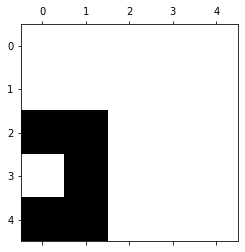

In [142]:
# initialize(5,0.3)
# print(maze_size)
# plt.spy(grid)

In [128]:
# path = astar((4,4),(2,4),grid)

{(4, 4): 0}
if condition done: [(3, 4), (4, 3)]
visited removed:  [(3, 4), (4, 3)]
blocked removed:  [(4, 3)]
children of  (4, 4)  :  [(4, 3)]
{(4, 3): 4}
if condition done: [(3, 3), (4, 4), (4, 2)]
visited removed:  [(3, 3), (4, 2)]
blocked removed:  [(3, 3)]
children of  (4, 3)  :  [(3, 3)]
{(3, 3): 4}
if condition done: [(4, 3), (2, 3), (3, 4), (3, 2)]
visited removed:  [(2, 3), (3, 4), (3, 2)]
blocked removed:  [(3, 2)]
children of  (3, 3)  :  [(3, 2)]
{(3, 2): 6}
if condition done: [(4, 2), (2, 2), (3, 3), (3, 1)]
visited removed:  [(4, 2), (2, 2), (3, 1)]
blocked removed:  [(2, 2)]
children of  (3, 2)  :  [(2, 2)]
{(2, 2): 6}
if condition done: [(3, 2), (1, 2), (2, 3), (2, 1)]
visited removed:  [(1, 2), (2, 3), (2, 1)]
blocked removed:  [(1, 2)]
children of  (2, 2)  :  [(1, 2)]
{(1, 2): 8}
if condition done: [(2, 2), (0, 2), (1, 3), (1, 1)]
visited removed:  [(0, 2), (1, 3), (1, 1)]
blocked removed:  [(1, 3), (1, 1)]
children of  (1, 2)  :  [(1, 3), (1, 1)]
{(1, 3): 8, (1, 1): 10

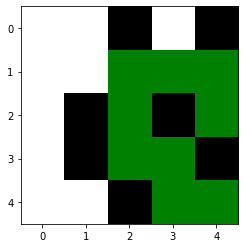

In [129]:
# display2(path,grid)